In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [13]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [14]:
df.shape

(9570, 5)

# **The project is divided in the following parts:**
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluatio of Model
6. Improvements
7. Convert to web app
8. Deploy

# **Data Cleaning**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9570 entries, 0 to 9569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          9570 non-null   object
 1   v2          9570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 374.0+ KB


In [16]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9570 entries, 0 to 9569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      9570 non-null   object
 1   v2      9570 non-null   object
dtypes: object(2)
memory usage: 149.7+ KB


In [18]:
df.sample(5)

,v1,v2
6988,spam,Your Tinder code is 785705
4859,ham,"\Response\"" is one of d powerful weapon 2 occu..."
2065,ham,Cos daddy arranging time c wat time fetch Ì_ m...
7978,spam,Your Uber code: 7211. Never share this code wi...
3912,ham,Yeah whatever lol


In [19]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
6432,spam,Your Keybase security code is: 403604. Don't s...
8513,spam,TamTam: 1082 - number confirmation code
7176,spam,Your one-time PIN for E2EMatch is 1496. This P...
2595,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
8130,spam,<#>BIGO LIVE code 950982. Don't share it with ...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
df['target']=encoder.fit_transform(df['target'])


In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
#duplicate values
df.duplicated().sum()

1062

In [25]:
df=df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

# **Exploratory Data Analysis**

In [27]:
df['target'].value_counts()

0    4516
1    3992
Name: target, dtype: int64

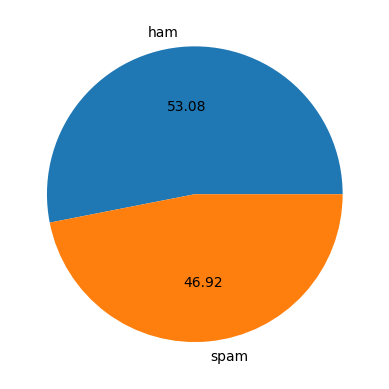

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [29]:
#Calculating number of characters, words and sentences in the sms.
# 1. Characters
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#num of words
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
df['num_words']= df['text'].apply(lambda x:len(word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# Number of sentences
df['num_sentences']=df['text'].apply(lambda x:len((sent_tokenize(x))))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
#Analyzing not spam messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#Analyzing Spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3992.000000,3992.000000,3992.000000
mean,83.244489,16.420090,1.918587
std,56.018197,11.417945,1.193457
min,3.000000,1.000000,1.000000
25%,42.000000,7.000000,1.000000
50%,67.000000,15.000000,2.000000
75%,115.000000,22.000000,2.250000
max,1009.000000,202.000000,13.000000


*The above analysis shows that the not spam messages tend to have more characters than the usual messages.*

In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

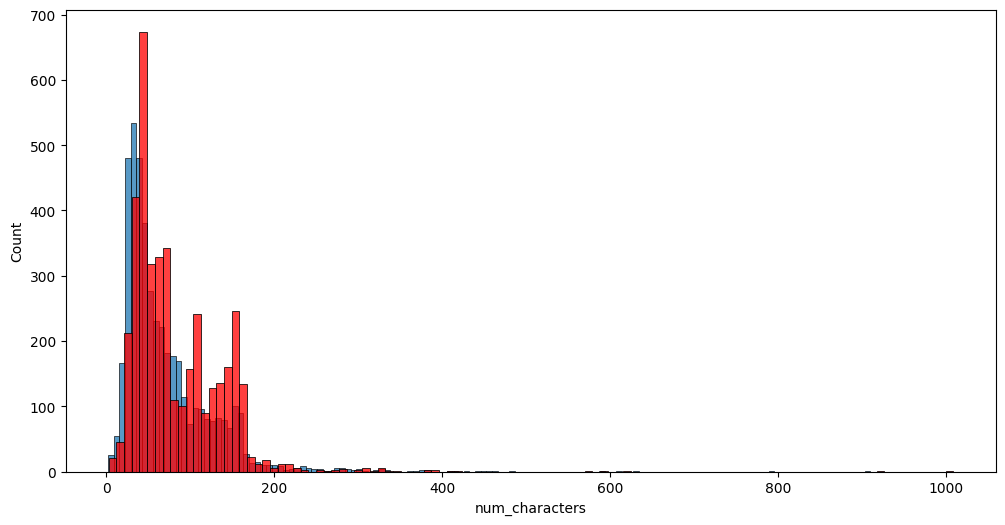

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

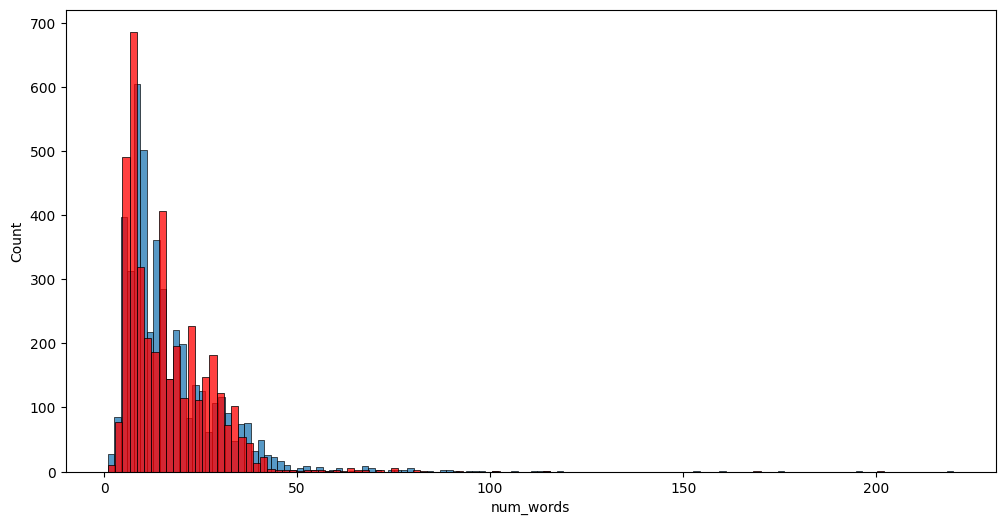

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

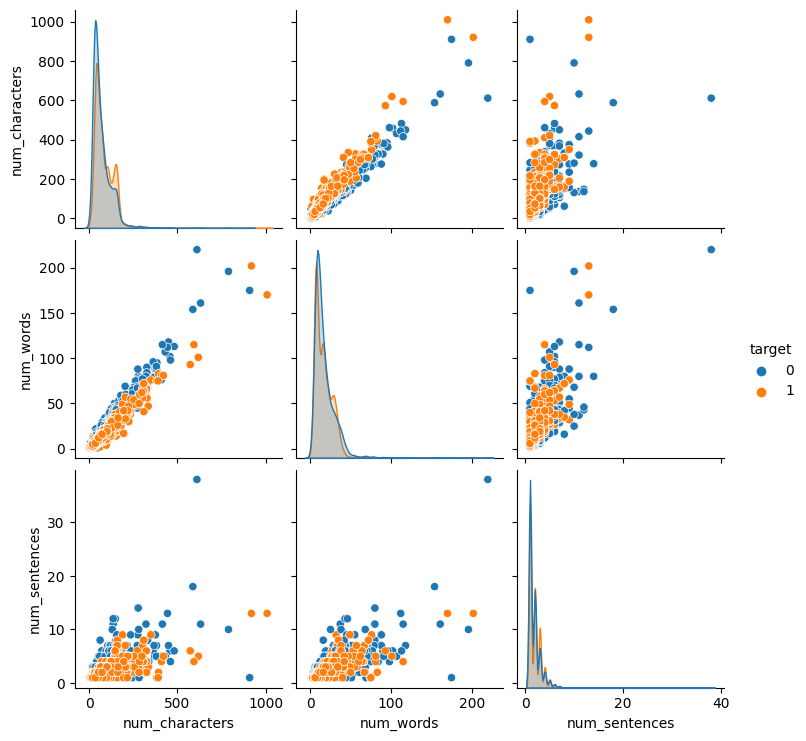

In [40]:
#Finding relationship between columns
sns.pairplot(df,hue='target')

In [41]:
df.corr()

<ipython-input-41-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.112822,-0.027946,0.037810
num_characters,0.112822,1.000000,0.958956,0.642447
num_words,-0.027946,0.958956,1.000000,0.707804
num_sentences,0.037810,0.642447,0.707804,1.000000


<ipython-input-42-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

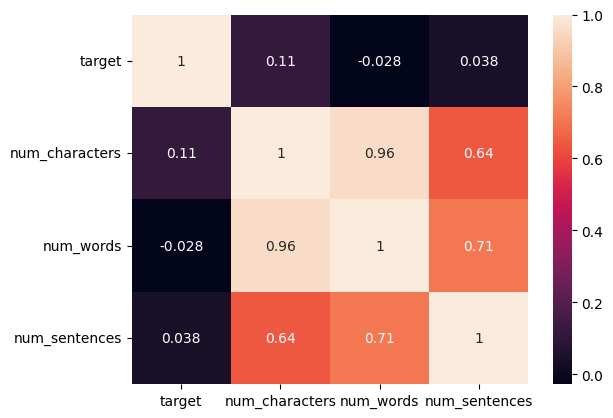

In [42]:
sns.heatmap(df.corr(),annot=True)

# **3. Data Preprocessing**


*   Lowercase
*   tokenization
*   Removing special charaters
*   Removing Stop Words and Punctuation
*   Stemming





In [43]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
def text_transform(text):
  text=text.lower()  #lowercasing
  text=nltk.word_tokenize(text)  #tokenization
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)   # removing special characters

  #stopwords
  z=[]
  for i in y:
    if i in stopwords.words('english'):
      pass
    else:
      z.append(i)

  #Stemming
  stemmer = PorterStemmer()
  stemmed_words = [stemmer.stem(word) for word in z]
  return ' '.join(stemmed_words)

In [45]:
text_transform("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri'

In [46]:
df['transformed_text']=df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud

In [48]:
#wc=WordCloud(width=500,height=500,background_color='white')
#spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
#plt.imshow(spam_wc)

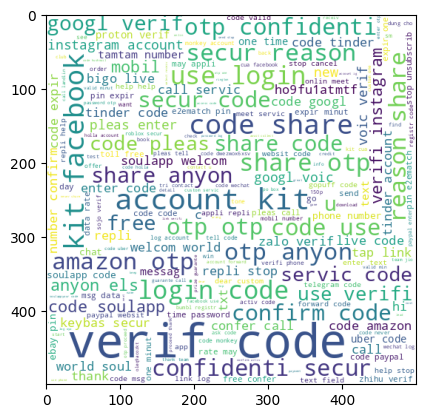

In [49]:

cs= df[df['target']==1]['transformed_text']
csf=' '.join(cs)
wc=WordCloud(width=500,height=500,background_color='white').generate(csf)
plt.imshow(wc)

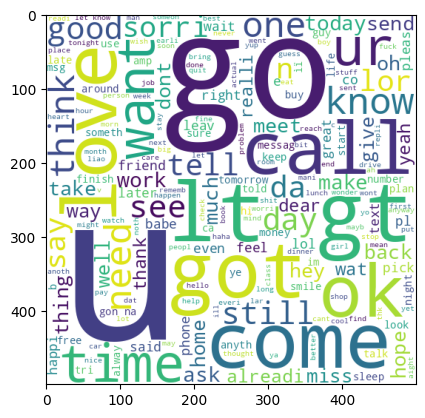

In [50]:
cs= df[df['target']==0]['transformed_text']
csf=' '.join(cs)
wc=WordCloud(width=500,height=500,background_color='white').generate(csf)
plt.imshow(wc)

# **Model Building**

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [67]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(8508, 10133)

In [69]:
y=df['target'].values

In [70]:
y.shape

(8508,)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.935957696827262
[[878  28]
 [ 81 715]]
0.9623149394347241


In [76]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.95475910693302
[[888  18]
 [ 59 737]]
0.976158940397351


In [77]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9618096357226792
[[893  13]
 [ 52 744]]
0.9828269484808454


In [78]:
import pickle

In [79]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))